In [1]:
# Import necessary libraries for data handling and visualization
import os  # Operating system module for interacting with the file system
import cv2  # OpenCV library for computer vision tasks
import pandas as pd  # Pandas library for data manipulation and analysis
import numpy as np  # NumPy library for numerical computations
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs and images
import seaborn as sns  # Seaborn for statistical data visualization
# Import machine learning-related libraries
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test sets
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels into numerical format
import keras  # High-level neural networks API for building and training deep learning models
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification tasks

# Import tqdm for displaying progress bars during loops
from tqdm import tqdm

# Import TensorFlow for building and training deep learning models
import tensorflow as tf
from tensorflow.keras import layers, models ,applications  # Keras API for building and defining neural network models
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

In [2]:
# Initialize empty lists to store image paths and labels
images = []
labels = []

# Iterate through each subfolder in the specified directory ('G:\asl_dataset')
for subfolder in tqdm(os.listdir(r'G:\asl_dataset')):
    # Create the complete path to the subfolder
    subfolder_path = os.path.join(r'G:\asl_dataset', subfolder)
    
    # Iterate through each image file in the current subfolder
    for image_filename in os.listdir(subfolder_path):
        # Create the complete path to the image file
        image_path = os.path.join(subfolder_path, image_filename)
        
        # Append the image path to the 'images' list
        images.append(image_path)
        
        # Append the subfolder (which represents the label) to the 'labels' list
        labels.append(subfolder)

# Create a DataFrame using the 'images' and 'labels' lists
df = pd.DataFrame({'image': images, 'label': labels})

# Display the resulting DataFrame
df


100%|██████████| 36/36 [00:00<00:00, 566.63it/s]


image label
0     G:\asl_dataset\0\hand1_0_bot_seg_1_cropped.jpeg     0
1     G:\asl_dataset\0\hand1_0_bot_seg_2_cropped.jpeg     0
2     G:\asl_dataset\0\hand1_0_bot_seg_3_cropped.jpeg     0
3     G:\asl_dataset\0\hand1_0_bot_seg_4_cropped.jpeg     0
4     G:\asl_dataset\0\hand1_0_bot_seg_5_cropped.jpeg     0
...                                               ...   ...
2510  G:\asl_dataset\z\hand5_z_dif_seg_1_cropped.jpeg     z
2511  G:\asl_dataset\z\hand5_z_dif_seg_2_cropped.jpeg     z
2512  G:\asl_dataset\z\hand5_z_dif_seg_3_cropped.jpeg     z
2513  G:\asl_dataset\z\hand5_z_dif_seg_4_cropped.jpeg     z
2514  G:\asl_dataset\z\hand5_z_dif_seg_5_cropped.jpeg     z

[2515 rows x 2 columns]

1. Initialization: Empty lists images and labels are created to hold the image file paths and their respective labels.

2. Directory Iteration: The script goes through each subfolder within the directory located at 'G:\asl_dataset'.

3. File Path Creation: For each subfolder, it forms the complete path (subfolder_path) to access the contained images.

4. Image File Iteration: It iterates through each image file within the current subfolder.

4. Image Path Collection: The complete path to each image file (image_path) is created by joining the subfolder path with the image filename.

5. Appending Paths and Labels: The image_path is appended to the images list, and the subfolder name (representing the label) is appended to the labels list.

6. DataFrame Creation: Using the collected image paths and their corresponding labels, a pandas DataFrame (df) is constructed with columns 'image' and 'label'.

7. Display DataFrame: The resulting DataFrame is displayed, containing two columns: 'image' with the file paths and 'label' with the corresponding labels.

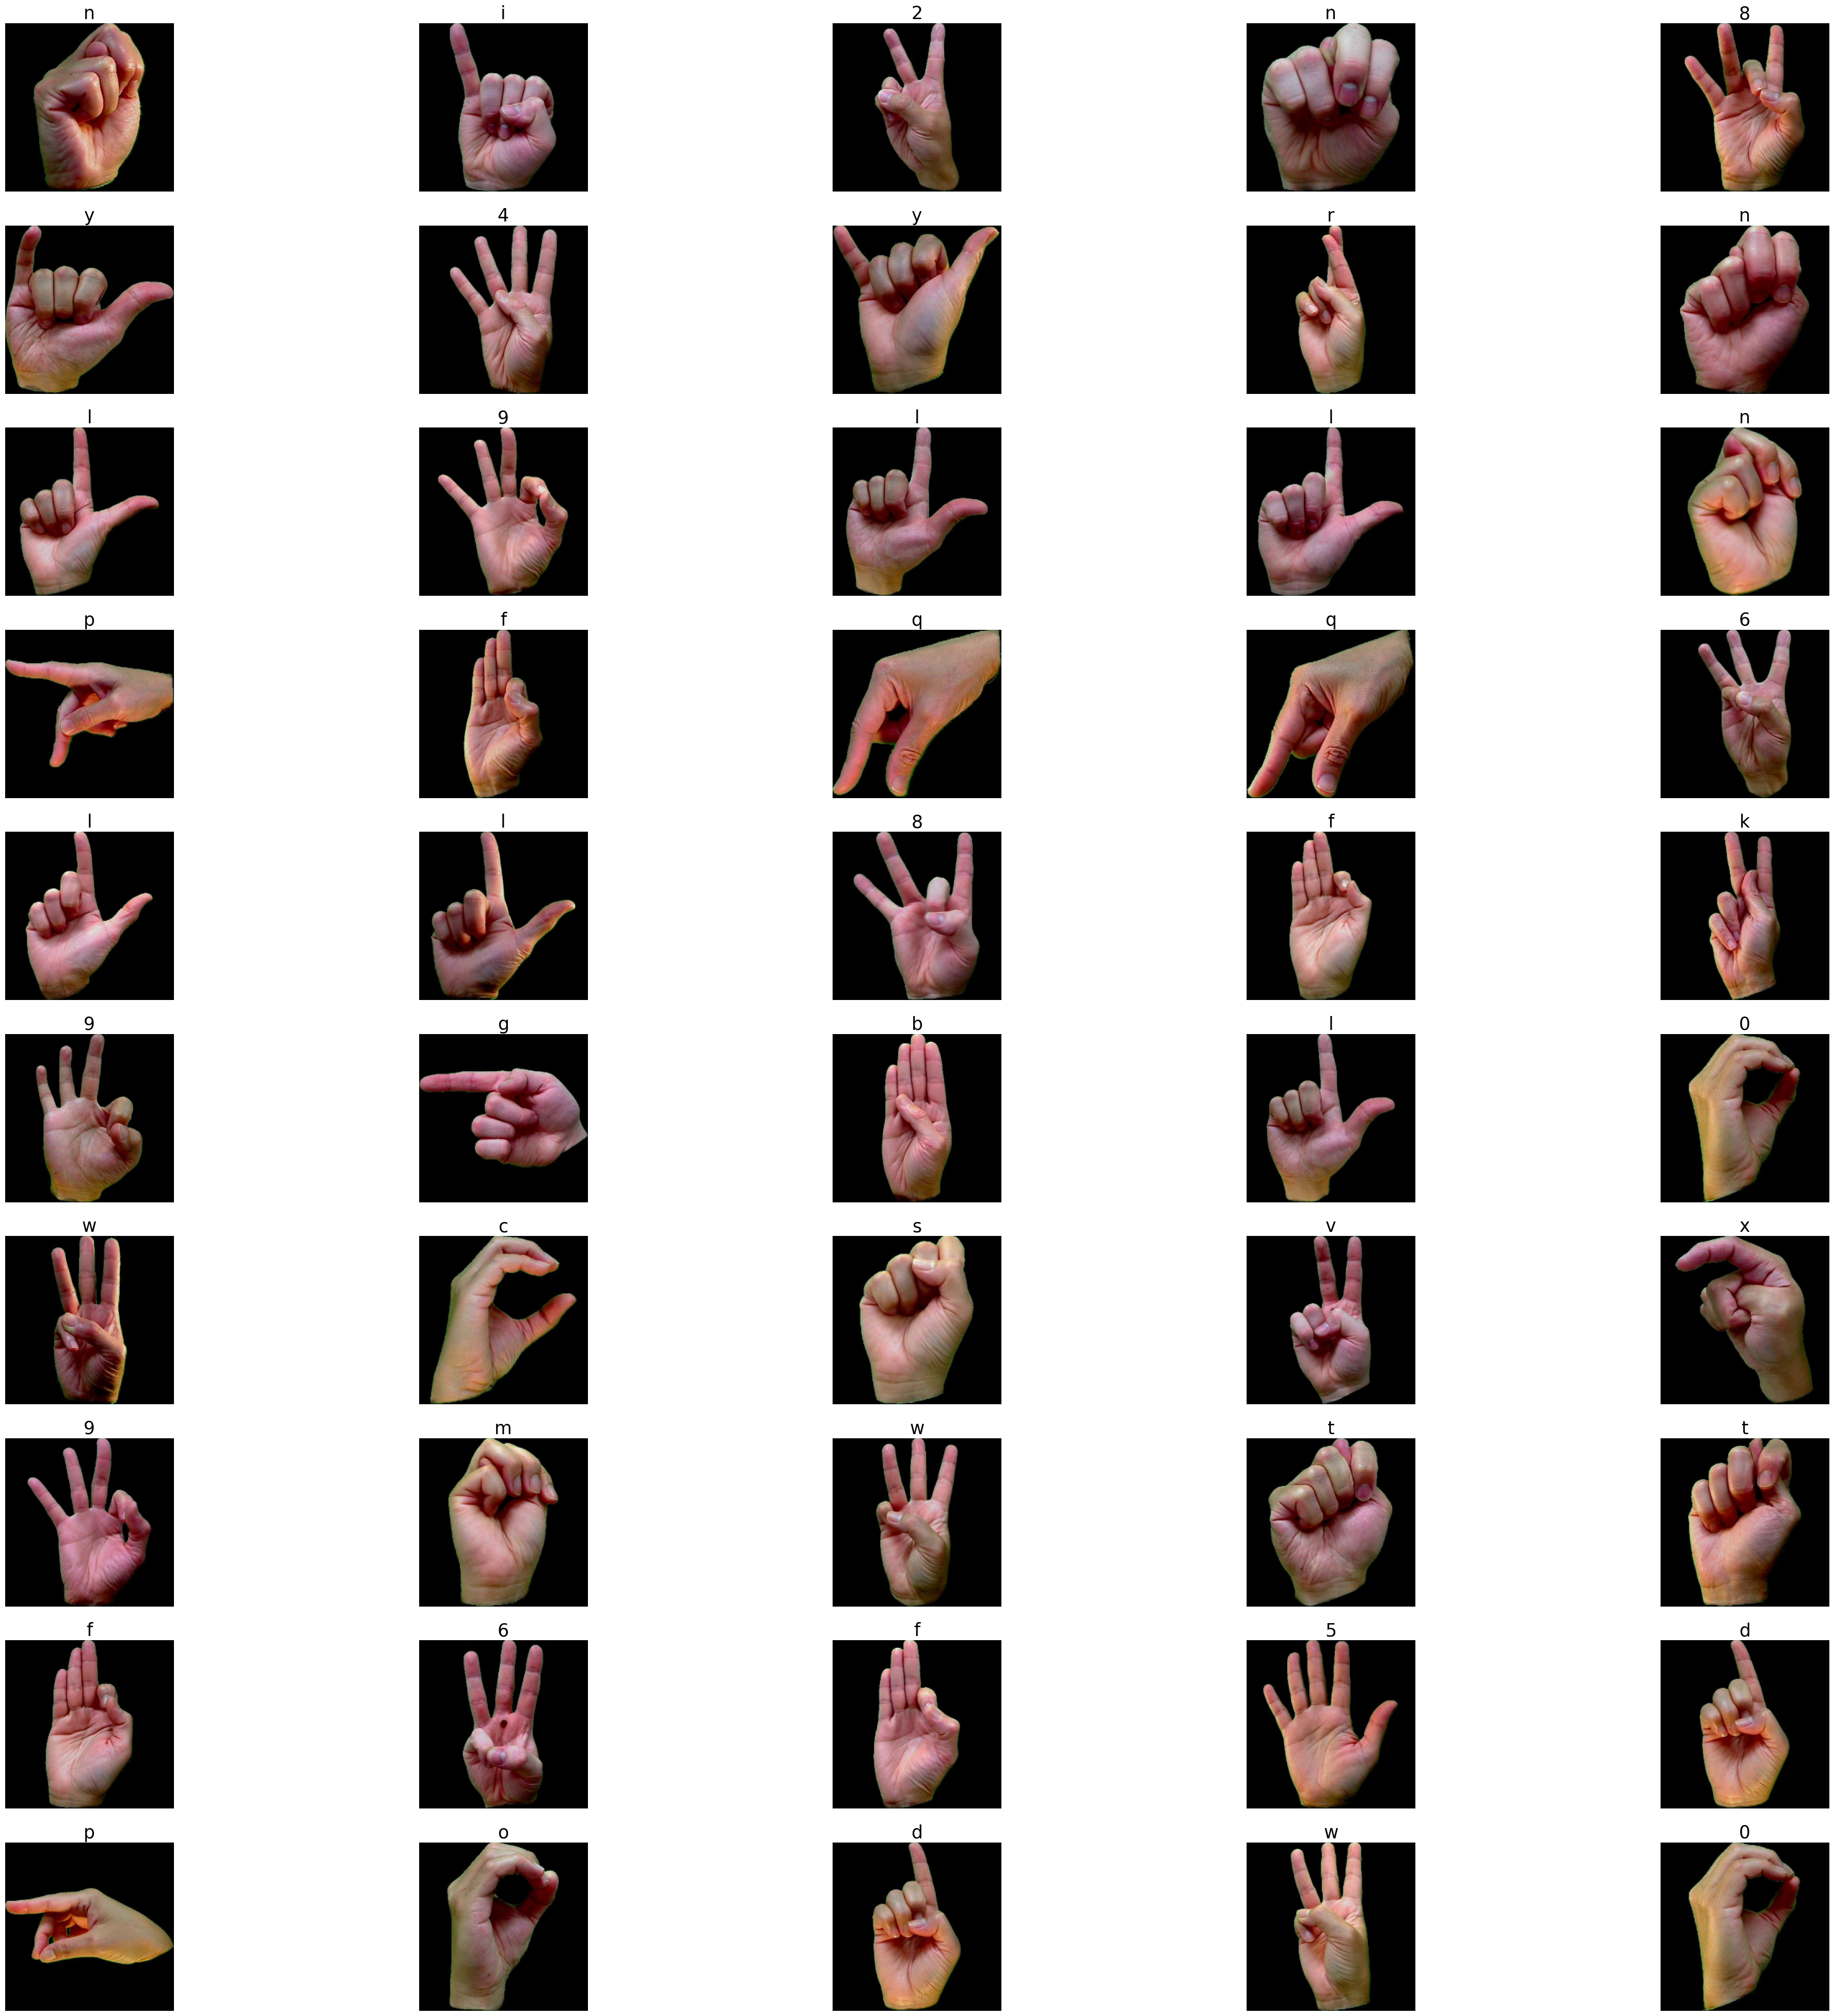

In [3]:
# Set the figure size for the entire subplot grid
plt.figure(figsize=(50,50))

# Loop over a randomly selected subset of 50 samples from the DataFrame
for n, i in enumerate(np.random.randint(0, len(df), 50)):
    
    # Create subplots in a 10x5 grid
    plt.subplot(10, 5, n+1)
    
    # Read and resize the image at index 'i' from the DataFrame
    img = cv2.imread(df.image[i])
    img = cv2.resize(img, (224, 224))
    
    # Convert the image color format from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image in the subplot
    plt.imshow(img)
    
    # Turn off axis labels
    plt.axis('off')
    
    # Set the title of the subplot with the corresponding label from the DataFrame
    plt.title(df.label[i], fontsize=25)


1. Setting the Figure Size: Establishes a large figure size for the entire grid of subplots to be displayed.

2. Looping Over a Subset of DataFrame Samples:
    Randomly selects 50 indices (i) from the DataFrame using np.random.randint.
    Loops through each selected index within the specified range.
3. Creating Subplots:
    Sets up subplots in a 10x5 grid (50 subplots in total) using plt.subplot.
4. Image Processing and Display:
    Reads the image at the current index (i) from the DataFrame using OpenCV's cv2.imread.
    Resizes the image to a uniform size (224x224 pixels) using cv2.resize.
    Converts the image color format from BGR (OpenCV default) to RGB using cv2.cvtColor.
    Displays the image in the current subplot using plt.imshow.
5. Plot Customization:
     Turns off axis labels using plt.axis('off') to remove axis ticks and labels.
     Sets the title of each subplot to the corresponding label fetched from the DataFrame using plt.title, displaying the        label text with a font size of 25.


In [4]:
# Define a function to preprocess input images
def preprocess_image(image_path):
    # Read the image file from the specified path using TensorFlow's IO module
    image = tf.io.read_file(image_path)
    
    # Decode the image from its raw binary format and specify the number of color channels (3 for RGB)
    image = tf.image.decode_image(image, channels=3)
    
    # Resize the image to a standard size (28x28 in this case)
    # Adjust the size as needed for your specific use case
    image = tf.image.resize(image, (28, 28))
    
    # Normalize pixel values to be in the range [0, 1]
    # This is a common practice for neural network input data
    image = image / 255.0
    
    # Return the preprocessed image
    return image


1. Read Image File:
    Utilizes TensorFlow's IO module (tf.io.read_file) to read the image file from the specified image_path.
    Decode Image:
    Decodes the raw binary image data using tf.image.decode_image, specifying the number of color channels as 3 (for RGB images).
2. Resize Image:
    Resizes the image to a standard size of 28x28 pixels using tf.image.resize.
    The comment suggests adjusting this size according to the specific requirements of the neural network or use case.
3. Normalize Pixel Values:

4. Normalizes the pixel values to be within the range [0, 1] by dividing each pixel value by 255.0. This normalization is a common practice for preparing input data for neural networks.
5. Return Preprocessed Image:
    Returns the preprocessed image as the output of the function.

In [5]:
# Split the dataset into training and testing sets using train_test_split
# X_train and y_train represent the features and labels of the training set
# X_test1 and y_test1 represent the features and labels of the initial testing set
X_train, X_test1, y_train, y_test1 = train_test_split(df['image'], df['label'], test_size=0.3, random_state=42, shuffle=True, stratify=df['label'])

# Further split the initial testing set into a validation set (X_val, y_val) and a final testing set (X_test, y_test)
# The validation set is 50% of the initial testing set, and the random state and shuffling are maintained for consistency
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42, shuffle=True, stratify=y_test1)

# Create DataFrames (df_train, df_test, df_val) from the split datasets to organize the data for further processing
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

1. Initial Split:
    Splits the original dataset (df) into training and initial testing sets.
    X_train and y_train hold the features (image paths) and labels for the training set.
    X_test1 and y_test1 hold the features and labels for the initial testing set.
    The split ratio is 70% for training (test_size=0.3) and 30% for initial testing.
2. Further Split of the Initial Testing Set:
    Splits the initial testing set (X_test1, y_test1) into a validation set (X_val, y_val) and a final testing set (X_test, y_test).
    The validation set comprises 50% of the initial testing set (test_size=0.5), while the remaining 50% becomes the final testing set.
    Maintains the same random state (random_state=42) and shuffling to ensure consistency in the split.
3. DataFrame Creation:
    Constructs three separate DataFrames to organize the split datasets for further processing:
    df_train contains the training set with columns 'image' and 'label'.
    df_test contains the final testing set with columns 'image' and 'label'.
    df_val contains the validation set with columns 'image' and 'label'.

In [6]:
# Create an instance of LabelEncoder to transform categorical labels into numerical format
encoder = LabelEncoder()

# Fit the encoder on the training set labels and simultaneously transform them
# This assigns unique numerical values to each unique label in the 'label' column of df_train
y_train_encoded = encoder.fit_transform(df_train['label'])

# Transform the validation set labels using the same encoder instance
# This ensures consistency in label encoding across training and validation sets
y_val_encoded = encoder.transform(df_val['label'])

# Transform the test set labels using the same encoder instance
# This ensures consistency in label encoding across training and testing sets
y_test_encoded = encoder.transform(df_test['label'])


1. Label Encoding Process:
    LabelEncoder is instantiated as encoder.
2. Fitting and Transforming Training Set Labels:
    fit_transform is applied on the labels (df_train['label']) within the training set.
    This step both fits the encoder to the unique labels in the training set and transforms these textual labels into unique numerical values.
    The transformed labels are stored in y_train_encoded.
3. Consistent Transformation of Validation Set:
    transform is used on the validation set's labels (df_val['label']) using the same encoder instance.
    This action ensures consistency in label encoding across both training and validation sets.
    The transformed validation set labels are stored in y_val_encoded.
4. Consistent Transformation of Test Set:
    Similar to the validation set, the test set's labels (df_test['label']) are transformed using the same encoder instance.
    Maintains consistency in label encoding across training and testing sets.
    The transformed test set labels are stored in y_test_encoded.

In [7]:
# Apply the preprocess_image function to each image path in the 'image' column of df_train
# This generates a new column 'X_train_processed' containing preprocessed images
X_train_processed = df_train['image'].apply(preprocess_image)

# Apply the preprocess_image function to each image path in the 'image' column of df_val
# This generates a new column 'X_val_processed' containing preprocessed images
X_val_processed = df_val['image'].apply(preprocess_image)

# Apply the preprocess_image function to each image path in the 'image' column of df_test
# This generates a new column 'X_test_processed' containing preprocessed images
X_test_processed = df_test['image'].apply(preprocess_image)

1. Preprocessing Training Set:
    df_train['image'].apply(preprocess_image) applies the preprocess_image function to each image path in the 'image' column of the training set DataFrame (df_train).
    Generates a new column named 'X_train_processed' containing the preprocessed images as a result of applying preprocess_image to each path.
2. Preprocessing Validation Set:
    df_val['image'].apply(preprocess_image) does the same operation on the image paths in the 'image' column of the validation set DataFrame (df_val).
    Creates a new column named 'X_val_processed' storing the preprocessed images.
3. Preprocessing Test Set:
    Similar to the training and validation sets, df_test['image'].apply(preprocess_image) preprocesses the image paths in the 'image' column of the test set DataFrame (df_test).
    Generates a new column named 'X_test_processed' containing the preprocessed images.

In [8]:
# Convert the preprocessed images in the 'X_train_processed' column to a TensorFlow tensor
# The .values attribute is used to get the underlying NumPy array from the Pandas Series
# tf.stack is then applied to create a tensor by stacking the images along a new axis
X_train_processed = tf.stack(X_train_processed.values)

# Convert the preprocessed images in the 'X_val_processed' column to a TensorFlow tensor
# Similar to the 'X_train_processed' conversion
X_val_processed = tf.stack(X_val_processed.values)

# Convert the preprocessed images in the 'X_test_processed' column to a TensorFlow tensor
# Similar to the 'X_train_processed' conversion
X_test_processed = tf.stack(X_test_processed.values)


1. Conversion of Training Set Images:
    X_train_processed = tf.stack(X_train_processed.values) transforms the preprocessed images from the 'X_train_processed' column of the training set DataFrame (df_train) into a TensorFlow tensor.
    X_train_processed.values retrieves the underlying NumPy array from the Pandas Series of preprocessed images.
    tf.stack is applied to this array to create a new TensorFlow tensor by stacking the images along a new axis. This results in a tensor containing all the preprocessed training set images.
2. Conversion of Validation Set Images:
    Similar to the training set, X_val_processed = tf.stack(X_val_processed.values) converts the preprocessed images from the 'X_val_processed' column of the validation set DataFrame (df_val) into a TensorFlow tensor.
    X_val_processed.values retrieves the NumPy array, and tf.stack creates a tensor from these images.
3. Conversion of Test Set Images:
    Likewise, X_test_processed = tf.stack(X_test_processed.values) converts the preprocessed images from the 'X_test_processed' column of the test set DataFrame (df_test) into a TensorFlow tensor.
    X_test_processed.values retrieves the NumPy array, and tf.stack creates a tensor from these images.

In [9]:
# Define the Convolutional Neural Network (CNN) Cnn using Keras Sequential API
Cnn = models.Sequential()

# Add a 2D convolutional layer with 32 filters, each of size (3, 3), using the ReLU activation function
# Specify the input shape as (28, 28, 3), representing a 28x28 image with 3 color channels (RGB)
Cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))

# Add a max pooling layer with a pool size of (2, 2) to downsample the spatial dimensions
Cnn.add(layers.MaxPooling2D((2, 2)))

# Add another 2D convolutional layer with 64 filters and a (3, 3) filter size, using ReLU activation
Cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with a (2, 2) pool size
Cnn.add(layers.MaxPooling2D((2, 2)))

# Add a third 2D convolutional layer with 64 filters and a (3, 3) filter size, using ReLU activation
Cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output to a 1D tensor to connect to densely connected layers
Cnn.add(layers.Flatten())

# Add a densely connected layer with 64 units and ReLU activation
Cnn.add(layers.Dense(64, activation='relu'))

# Add the output layer with the number of classes equal to the unique labels encoded by the LabelEncoder
# The activation function is softmax, suitable for multiclass classification
Cnn.add(layers.Dense(len(encoder.classes_), activation='softmax'))


1. Initialization:Creates a Sequential model named Cnn.
2. Convolutional Layers:
    Adds a 2D convolutional layer (Conv2D) with 32 filters, each sized (3, 3), using the ReLU activation function. The input shape is specified as (28, 28, 3), indicating a 28x28 image with 3 color channels (RGB).
    Incorporates a max pooling layer (MaxPooling2D) with a pool size of (2, 2) to downsample spatial dimensions.
3. Additional Convolutional Layers:
    Adds another 2D convolutional layer with 64 filters and a (3, 3) filter size, using ReLU activation.
    Includes another max pooling layer with a (2, 2) pool size.
4. Flattening:
    Flattens the output from the convolutional layers into a 1D tensor to prepare for the fully connected layers.
5. Densely Connected Layers:
    Adds a densely connected layer (Dense) with 64 units and ReLU activation.
6. Output Layer:
    Adds the output layer with the number of units equal to the unique classes encoded by the LabelEncoder.
    Uses the softmax activation function, which is suitable for multiclass classification problems as it provides probabilities for each class.

In [10]:
# Compile the CNN model using the Adam optimizer, which adapts the learning rate during training
# Other optimizers like SGD or RMSprop could be used based on the specific task
Cnn.compile(optimizer='adam',

              # Specify the loss function for the training process
              # 'sparse_categorical_crossentropy' is used when the labels are integers (not one-hot encoded)
              loss='sparse_categorical_crossentropy',

              # Define metrics to monitor during training; here, accuracy is chosen
              metrics=['accuracy'])


1. Optimizer:
    Uses the Adam optimizer by specifying optimizer='adam'. Adam is an optimization algorithm that adapts the learning rate during training, often performing well for various types of models.
2. Loss Function:
    Sets the loss function for the training process to 'sparse_categorical_crossentropy'. This loss function is suitable when the labels are integers (not one-hot encoded). It calculates the cross-entropy loss between the true labels and the predicted probabilities for multi-class classification tasks.
3. Metrics:
    Chooses 'accuracy' as the metric to monitor during training. The accuracy metric evaluates the model's performance based on the proportion of correctly predicted samples to the total number of samples.

In [11]:
# Train the model
history = Cnn.fit(X_train_processed, y_train_encoded, epochs=100, validation_data=(X_val_processed, y_val_encoded))


Epoch 1/100


55/55 [==============================] - 4s 30ms/step - loss: 3.3451 - accuracy: 0.1057 - val_loss: 2.6540 - val_accuracy: 0.2387
Epoch 2/100
55/55 [==============================] - 1s 22ms/step - loss: 1.7918 - accuracy: 0.4523 - val_loss: 1.1897 - val_accuracy: 0.6074
Epoch 3/100
55/55 [==============================] - 1s 24ms/step - loss: 0.8247 - accuracy: 0.7318 - val_loss: 0.6696 - val_accuracy: 0.7878
Epoch 4/100
55/55 [==============================] - 1s 24ms/step - loss: 0.5040 - accuracy: 0.8318 - val_loss: 0.4585 - val_accuracy: 0.8355
Epoch 5/100
55/55 [==============================] - 2s 29ms/step - loss: 0.3784 - accuracy: 0.8733 - val_loss: 0.3661 - val_accuracy: 0.8647
Epoch 6/100
55/55 [==============================] - 2s 30ms/step - loss: 0.2944 - accuracy: 0.8989 - val_loss: 0.3296 - val_accuracy: 0.8806
Epoch 7/100
55/55 [==============================] - 2s 27ms/step - loss: 0.2326 - accuracy: 0.9187 - val_loss: 0.3008 - val_accuracy: 0.9045
Epoc

In [12]:
# Evaluate the model on the test set
test_lossCNN, test_accCNN = Cnn.evaluate(X_test_processed, y_test_encoded)
print("\nTest accuracy:", test_accCNN)

12/12 [==============================] - 0s 10ms/step - loss: 0.2119 - accuracy: 0.9630

Test accuracy: 0.9629629850387573


# VGG16

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd

# Assuming you have X_train, y_train, X_val, y_val defined

# Convert labels to string and then to numeric, ignoring errors
y_train = pd.to_numeric(y_train, errors='coerce')
y_val = pd.to_numeric(y_val, errors='coerce')

# Drop rows with NaN (resulting from non-numeric values)
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

X_val = X_val[~y_val.isna()]
y_val = y_val.dropna()

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

# Load and preprocess images for VGG16
def load_and_preprocess_images(file_paths):
    images = []
    for file_path in file_paths:
        img = image.load_img(file_path, target_size=(224, 224))  # VGG16 input size
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
    return np.array(images)

# Load and preprocess training and validation images
X_train_processed = load_and_preprocess_images(X_train)
X_val_processed = load_and_preprocess_images(X_val)

# Create and compile the VGG16-based vgg16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg16_base.layers:
    layer.trainable = False

vgg16 = models.Sequential()
vgg16.add(vgg16_base)
vgg16.add(layers.Flatten())
vgg16.add(layers.Dense(64, activation='relu'))
vgg16.add(layers.Dense(len(np.unique(y_train)), activation='softmax'))  # Adjust the number of classes
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the vgg16
history = vgg16.fit(X_train_processed, y_train_encoded, epochs=10, validation_data=(X_val_processed, y_val_encoded))


Epoch 1/10
16/16 [==============================] - 407s 26s/step - loss: 5.2564 - accuracy: 0.6551 - val_loss: 0.6745 - val_accuracy: 0.9048
Epoch 2/10
16/16 [==============================] - 419s 26s/step - loss: 0.1504 - accuracy: 0.9571 - val_loss: 0.1402 - val_accuracy: 0.9714
Epoch 3/10
16/16 [==============================] - 414s 26s/step - loss: 0.0371 - accuracy: 0.9898 - val_loss: 0.0890 - val_accuracy: 0.9714
Epoch 4/10
16/16 [==============================] - 413s 26s/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.0838 - val_accuracy: 0.9905
Epoch 5/10
16/16 [==============================] - 385s 24s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9905
Epoch 6/10
16/16 [==============================] - 362s 23s/step - loss: 5.9049e-04 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9810
Epoch 7/10
16/16 [==============================] - 489s 31s/step - loss: 4.7228e-04 - accuracy: 1.0000 - val_loss: 0.0957 - val_accuracy: 0.981

1. Label Preprocessing:
    Converts the labels in y_train and y_val to numeric format using pd.to_numeric, coercing non-numeric values to NaN.
    Drops rows with NaN labels from X_train and X_val to ensure alignment between images and labels.
2. One-Hot Encoding:
    Converts the numeric labels (y_train, y_val) to one-hot encoded format using to_categorical. This prepares the labels for multi-class classification.
3. Image Loading and Preprocessing:
    Defines a function load_and_preprocess_images to load, resize (to VGG16 input size), and preprocess images for VGG16 consumption.
    Loads and preprocesses images from X_train and X_val using the defined function.
4. VGG16 Model Configuration:
    Loads the VGG16 model (VGG16) pre-trained on ImageNet without the fully connected layers (include_top=False) and with a specified input shape.
    Freezes the weights of the pre-trained layers to retain their learned representations.
    Constructs a new Sequential model vgg16 with the VGG16 base followed by a flattening layer, dense layer with ReLU activation, and an output dense layer for the number of classes.
5. Compilation and Training:
    Compiles the vgg16 model using Adam optimizer, categorical cross-entropy loss, and accuracy metric.
    Trains the model (vgg16) on preprocessed training data (X_train_processed, y_train_encoded) for 10 epochs, validating on the preprocessed validation data (X_val_processed, y_val_encoded).

In [14]:
# Print the final training accuracy
final_train_accuracy = history.history['accuracy'][-1]
print(f'Final Training Accuracy: {final_train_accuracy}')

# Print the final validation accuracy
final_val_accuracy_VGG16 = history.history['val_accuracy'][-1]
print(f'Final Validation Accuracy: {final_val_accuracy_VGG16}')

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.9809523820877075


# Resent50

In [15]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models, applications

# Convert labels to string and then to numeric, ignoring errors
y_train = pd.to_numeric(y_train, errors='coerce')
y_val = pd.to_numeric(y_val, errors='coerce')

# Drop rows with NaN (resulting from non-numeric values)
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

X_val = X_val[~y_val.isna()]
y_val = y_val.dropna()

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

# Load and preprocess images for ResNet50
def load_and_preprocess_images(file_paths):
    images = []
    for file_path in file_paths:
        img = image.load_img(file_path, target_size=(224, 224)) 
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
    return np.array(images)

# Load and preprocess training and validation images
X_train_processed = load_and_preprocess_images(X_train)
X_val_processed = load_and_preprocess_images(X_val)

# Create and compile the ResNet50-based Resent50
resnet50_base = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet50_base.layers:
    layer.trainable = False

Resent50 = models.Sequential()
Resent50.add(resnet50_base)
Resent50.add(layers.GlobalAveragePooling2D())
Resent50.add(layers.Dense(64, activation='relu'))
Resent50.add(layers.Dense(len(np.unique(y_train)), activation='softmax'))  # Adjust the number of classes
Resent50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Resent50
history = Resent50.fit(X_train_processed, y_train_encoded, epochs=10, validation_data=(X_val_processed, y_val_encoded))


Epoch 1/10
16/16 [==============================] - 118s 7s/step - loss: 2.0700 - accuracy: 0.2633 - val_loss: 1.4728 - val_accuracy: 0.5429
Epoch 2/10
16/16 [==============================] - 99s 6s/step - loss: 1.2110 - accuracy: 0.6959 - val_loss: 0.9721 - val_accuracy: 0.8095
Epoch 3/10
16/16 [==============================] - 96s 6s/step - loss: 0.7845 - accuracy: 0.8755 - val_loss: 0.7112 - val_accuracy: 0.8667
Epoch 4/10
16/16 [==============================] - 97s 6s/step - loss: 0.5392 - accuracy: 0.9306 - val_loss: 0.5556 - val_accuracy: 0.9143
Epoch 5/10
16/16 [==============================] - 96s 6s/step - loss: 0.4058 - accuracy: 0.9265 - val_loss: 0.4073 - val_accuracy: 0.9429
Epoch 6/10
16/16 [==============================] - 95s 6s/step - loss: 0.2920 - accuracy: 0.9694 - val_loss: 0.3241 - val_accuracy: 0.9714
Epoch 7/10
16/16 [==============================] - 102s 6s/step - loss: 0.2392 - accuracy: 0.9796 - val_loss: 0.2844 - val_accuracy: 0.9619
Epoch 8/10
16/16 [

1. Label Preprocessing:
    Converts the labels in y_train and y_val to numeric format using pd.to_numeric, coercing non-numeric values to NaN.
    Drops rows with NaN labels from X_train and X_val to ensure alignment between images and labels.
2. One-Hot Encoding:
    Converts the numeric labels (y_train, y_val) to one-hot encoded format using to_categorical. This prepares the labels for multi-class classification.
3. Image Loading and Preprocessing:
    Defines a function load_and_preprocess_images to load, resize (to ResNet50 input size), and preprocess images for ResNet50 consumption.
    Loads and preprocesses images from X_train and X_val using the defined function.
4. ResNet50 Model Configuration:
    Loads the ResNet50 model (ResNet50) pre-trained on ImageNet without the fully connected layers (include_top=False) and with a specified input shape.
    Freezes the weights of the pre-trained layers to retain their learned representations.
    Constructs a new Sequential model Resent50 with the ResNet50 base followed by a global average pooling layer, dense layer with ReLU activation, and an output dense layer for the number of classes.
5. Compilation and Training:
    Compiles the Resent50 model using Adam optimizer, categorical cross-entropy loss, and accuracy metric.
    Trains the model (Resent50) on preprocessed training data (X_train_processed, y_train_encoded) for 10 epochs, validating on the preprocessed validation data (X_val_processed, y_val_encoded).

In [16]:
# Print the final training accuracy
final_train_accuracy = history.history['accuracy'][-1]
print(f'Final Training Accuracy: {final_train_accuracy}')

# Print the final validation accuracy
final_val_accuracy_Resent50 = history.history['val_accuracy'][-1]
print(f'Final Validation Accuracy: {final_val_accuracy_Resent50}')

Final Training Accuracy: 0.9836734533309937
Final Validation Accuracy: 0.9714285731315613


# Compare Between Models

In [1]:
model_names = ['CNN', 'VGG16', 'Resent50']
# Train and evaluate each model
accuracies = []
accuracies.append(test_accCNN)
accuracies.append(final_val_accuracy_VGG16)
accuracies.append(final_val_accuracy_Resent50)
# Create a dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame({'Model': model_names,
                              'Accuracy': accuracies
                              })

# Print the evaluation metrics for each model
print(evaluation_df)

# Create a bar plot to compare the accuracy of the models
plt.bar(model_names, accuracies)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Print the best model based on accuracy
best_model = evaluation_df.loc[evaluation_df['Accuracy'].idxmax(), 'Model']
print(f'Best model: {best_model}')

NameError: name 'test_accCNN' is not defined

1. Model Evaluation:
    Creates a list model_names containing the names of the models.
    Collects the evaluation accuracies for each model (assuming these variables are pre-defined) and stores them in a list named accuracies.
    Constructs a DataFrame evaluation_df with columns 'Model' and 'Accuracy', using the model names and their respective accuracies.
2. Printing Evaluation Metrics:
    Prints the evaluation_df, displaying the model names and their accuracies.
3. Visualization - Bar Plot:
    Creates a bar plot to visualize and compare the accuracies of different models.
    Uses plt.bar to plot the accuracies for each model.
    Adds a title, x-label ('Model'), and y-label ('Accuracy') to the plot.
    Displays the plot using plt.show().
4. Identifying the Best Model:
    Identifies the best model based on the highest accuracy recorded in the evaluation_df.
    Prints the name of the best model by locating the row with the maximum accuracy and extracting the corresponding model name.

# Save Models

In [18]:
vgg16.save('vgg16.h5')

C:\conda11\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step


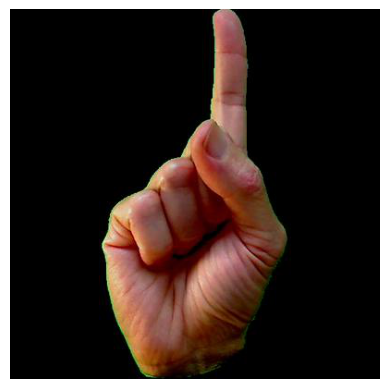

Predicted Label: 1


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
loaded_model = load_model('vgg16.h5')

def preprocess_new_image(image_path):
    # Read and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  
    processed_image = image.img_to_array(img)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = preprocess_input(processed_image)

    return processed_image

# Example usage for a single image path
image_path = "hand1_1_left_seg_4_cropped.jpeg"

new_image = preprocess_new_image(image_path)

# Get the model's prediction
predictions = loaded_model.predict(new_image)

# Display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Display or use the predicted labels as needed
predicted_labels = predictions.argmax(axis=1)
print("Predicted Label:", predicted_labels[0])


1. Loading the Model:
    Uses load_model from Keras to load a previously saved VGG16 model named 'vgg16.h5' into the variable loaded_model.
2. Image Preprocessing:
    Defines a function preprocess_new_image to read and preprocess a new image from the provided image_path.
    Reads the image, resizes it to (224, 224) (VGG16's input size), converts it into an array, expands its dimensions to match the model's input shape, and preprocesses the image using preprocess_input.
3. Example Usage:
    Demonstrates the usage of the preprocess_new_image function on a sample image at image_path.
    Preprocesses the image and stores it in new_image.
4. Model Prediction:
    Uses the loaded_model to predict the class probabilities for the preprocessed new_image using predict.
5. Displaying the Image:
    Loads and displays the original image from image_path using Matplotlib (plt.imread and plt.imshow) to visualize the image being predicted.
    Removes axis labels for a cleaner display.
6. Predicted Label Display:
    Prints the predicted label obtained from the model predictions.